# Introduction to Plotting with Matplotlib, Seaborn and Plotly

## 1. Learning Objectives

By the end of this notebook, you will be able to:

- **Understand the Python visualization ecosystem**
- **Choose the appropriate plot type** for different types of data and analytical questions
- **Create basic plots using Matplotlib**, including scatter plots, line plots, histograms, and bar charts
- **Use Seaborn in combination with Matplotlib** for high-level statistical visualizations with minimal code
- **Generate interactive visualizations** using Plotly

### Python Plotting Libraries

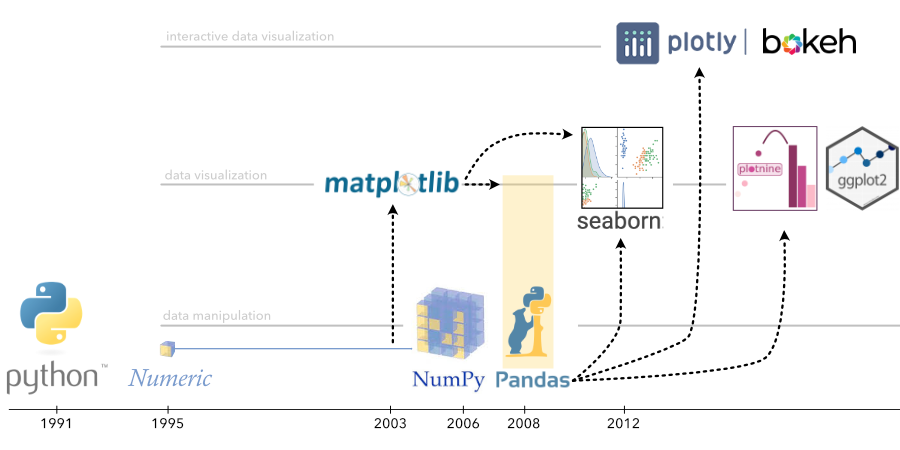

Python's data visualization ecosystem has evolved significantly over the years:

- **Matplotlib** (2003): The foundational plotting library, providing fine-grained control over every aspect of a figure. It follows a MATLAB-style interface and is the basis for many other visualization libraries.

- **Seaborn** (2012): Built on top of Matplotlib, Seaborn provides a high-level interface for creating attractive statistical graphics with less code. It integrates seamlessly with Pandas DataFrames.

- **Plotly** (2013): A modern library focused on interactive, web-based visualizations. Perfect for dashboards and exploratory data analysis where user interaction enhances understanding.

**When to use each library:**
- Use **Matplotlib** when you need complete control over your visualization or for publication-quality static plots
- Use **Seaborn** for statistical visualizations and when working with Pandas DataFrames
- Use **Plotly** for interactive visualizations, dashboards, and web applications

### How to Choose the Right Visualization

Before we dive in, let's explore a comprehensive resource for choosing the right visualization:
you can interact with the output of the next cell and navigate through the graph decision tree guide

In [1]:
from IPython.display import IFrame
URL = 'https://www.data-to-viz.com/'
IFrame(src=URL,width=800,height=600)

## 2. Warm-up Exercise: Data Exploration
### Meet the [Palmer](https://pallter.marine.rutgers.edu/) Penguins

![palmer_penguins.png](images/palmer_penguins.png)

**About the Dataset:**

The Palmer Penguins dataset contains measurements of three penguin species (Adelie, Gentoo, and Chinstrap) observed on three islands in the Palmer Archipelago, Antarctica. This dataset is an excellent alternative to the classic Iris dataset for data exploration and visualization practice.

**Key features include:**
- Species, island, and sex information
- Physical measurements: bill length/depth, flipper length, body mass
- Perfect for exploring relationships between categorical and continuous variables

<br>

Credit: [Artwork by @allison_horst, CC BY 4.0](https://allisonhorst.github.io/palmerpenguins/)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exercise: Data Exploration

Before we can visualize data effectively, we need to understand it. Complete the following tasks:

* **Load the data**: Read `penguins_clean.csv` from the `data` folder into a Pandas DataFrame
* **Inspect the structure**: 
   * What columns are available?
   * What data types are present?
   * What are the descriptive statistics?
   * Are there any missing values?
     * If yes, drop all rows with missing values


In the next cells, replace the placeholder code `...` with your own code to complete the exercise.

#### Step 1: Load the data

**⚠️ Alert**: The data is available in the `data` folder

In [ ]:
df = pd.read_csv(...)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
329,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
330,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
331,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


#### Step 2: Inspect the data structure


In [ ]:
df...

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
6,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
7,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female
8,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male
9,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male


#### Step 3: Examine columns

In [ ]:
df...

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

#### Step 4: Check data types

In [ ]:
df...

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [ ]:
df...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


#### Step 5: Descriptive statistics

In [ ]:
df...

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [9]:
# Grouped descriptive statistics
df.groupby(by='island').describe().T

island                        Biscoe        Dream    Torgersen
bill_length_mm    count   163.000000   123.000000    47.000000
                  mean     45.248466    44.221951    39.038298
                  std       4.827319     5.947069     3.028097
                  min      34.500000    32.100000    33.500000
                  25%      41.850000    39.200000    36.650000
                  50%      45.800000    45.200000    39.000000
                  75%      48.750000    49.900000    41.100000
                  max      59.600000    58.000000    46.000000
bill_depth_mm     count   163.000000   123.000000    47.000000
                  mean     15.907362    18.339837    18.451064
                  std       1.827653     1.136629     1.346472
                  min      13.100000    15.500000    15.900000
                  25%      14.500000    17.500000    17.450000
                  50%      15.600000    18.400000    18.400000
                  75%      17.000000    19.000000    19.250000
                  max      21.100000    21.200000    21.500000
flipper_length_mm count   163.000000   123.000000    47.000000
                  mean    209.558282   193.186992   191.531915
                  std      14.282467     7.428732     6.220062
                  min     172.000000   178.000000   176.000000
                  25%     198.500000   188.000000   187.500000
                  50%     213.000000   193.000000   191.000000
                  75%     220.000000   198.000000   195.500000
                  max     231.000000   212.000000   210.000000
body_mass_g       count   163.000000   123.000000    47.000000
                  mean   4719.171779  3718.902439  3708.510638
                  std     790.860069   412.935581   451.846351
                  min    2850.000000  2700.000000  2900.000000
                  25%    4200.000000  3412.500000  3337.500000
                  50%    4800.000000  3700.000000  3700.000000
                  75%    5350.000000  3962.500000  4000.000000
                  max    6300.000000  4800.000000  4700.000000

#### Step 6: Check for missing values

**Hint**: Apply the [`isna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) method on the DataFrame to check for missing values, followed by `sum()` to count them.

In [ ]:
df...

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

---

## 3 From Questions to Insights

Before we dive into creating visualizations, let's understand how to approach exploratory data analysis systematically.

### The Question-Driven Workflow

In data science, visualization starts with **curiosity**: asking meaningful questions about your data. Good questions lead to better visualizations, and good visualizations reveal insights that triggers new questions.

**The key is to ask questions that are:**
- **Specific**: Focus on clear, measurable aspects of the data
- **Testable**: Can be answered by examining the data
- **Visual**: Lead naturally to a type of plot or chart

### The Process:

1. **Observe Your Data**
   - What variables do you have?
   - What types are they (numerical, categorical)?
   - Example: *"We have body mass, flipper length, species, and sex"*

2. **Ask a Focused Question**
   - Combine variables in meaningful ways
   - Example: *"Do bigger penguins have longer flippers?"*

3. **Consider What Would Answer It**
   - What pattern would you expect to see if the answer is "yes"?
   - What would it look like if the answer is "no"?
   - Example: *A positive correlation vs. random scatter*

4. **Choose an Appropriate Visualization**
   - Match the plot type to your question
   - Two continuous variables → scatter plot
   - Distribution of one variable → histogram
   - Comparing groups → box plots or grouped charts
   - Check out the above decision tree inside the IFrame cell

5. **Interpret and Iterate**
   - What does the visualization reveal?
   - Does it raise new questions?
   - Should you segment the data differently?

### Example Workflow:

**Question**: *"How does body mass compare across penguin species?"*

**What would answer it?**
- See if different species cluster at different weights
- Look for overlap or separation between groups

**Visualization choice**: Box plots or violin plots (compare distributions across categories)

**Possible insights**: 
- Gentoo penguins are noticeably heavier
- Adelie and Chinstrap have similar ranges with some overlap

**New questions that emerge**:
- Is this difference consistent for both males and females?
- Do heavier species also have longer flippers?

---

## 4. Plotting with Matplotlib

**Matplotlib** is Python's foundational plotting library, offering complete control over every aspect of your visualizations. While it requires more code than higher-level libraries, this granular control makes it perfect for:
- Publication-quality figures
- Custom visualizations
- Understanding how plotting works under the hood

### Key Concepts:
- **Figure**: The overall container (the entire plot window)
- **Axes**: Individual plot areas within a figure (can have multiple)
- **Artists**: Everything you see on the plot (lines, text, markers, etc.)

**Resource**: Check out the [Matplotlib gallery](https://matplotlib.org/stable/gallery/index.html) for examples of different plot types with code

### 4.1 Syntax for creating an empty figure

In [ ]:
fig, ax = plt.subplots() 

plt.show()

The code above creates a figure and axes using the recommended object-oriented approach:
- `fig`: The **Figure** object — the overall container for all plot elements (axes, titles, labels, etc.)
- `ax`: The **Axes** object — the actual plotting area where data is drawn

This gives you explicit control over both the container and the plot area, making it easy to create complex multi-panel visualizations.

In [ ]:
df[['body_mass_g']]

### 4.2 Adding data to axes of a figure
Once we have a figure and axes, we can add data using various plotting methods:
- `ax.plot()` for line plots
- `ax.scatter()` for scatter plots  
- `ax.bar()` for bar charts
- `ax.hist()` for histograms

Let's create a simple line plot of body mass:

In [ ]:
# Line plot with body_mass_g
fig, ax = plt.subplots()

ax.plot(df['body_mass_g'])

plt.show()


In the following sections, we'll pose questions and create visualizations to explore patterns in our penguin data. For each question, think about:
- What pattern we're looking for
- What the visualization might reveal
- What new questions emerge from what we find

> Remember: We're **exploring and describing** our sample data, not making statistical inferences about all penguins in Antarctica!

#### Question 1: Do bigger penguins have longer flippers?

**Question Analysis:**
- **Variables**: body_mass_g (continuous) and flipper_length_mm (continuous)
- **Expected pattern if related**: Positive correlation - as one increases, the other increases
- **Expected pattern if unrelated**: Random scatter with no clear trend

**Choosing the right plot type:**
- We're exploring the relationship between two continuous variables
- A **scatter plot** is ideal for showing correlations between variables

In [ ]:
df

In [ ]:
# figure size 
fig, ax = plt.subplots(figsize= (10,8))

ax.scatter(x=df['body_mass_g'],y=df['flipper_length_mm'])

plt.show()

**Observation**: There appears to be a positive correlation: as body mass increases, flipper length tends to increase as well. 

### 4.3 Configuring a plot
However, without labels and formatting, the plot is hard to interpret.

Let's improve the previous plot by adding:
- Clear axis labels with units
- A descriptive title
- Appropriate font sizes for better readability

**Customizing plot aesthetics:**

Matplotlib offers various [style sheets](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) to quickly change the overall appearance of your plots.

In [ ]:
plt.style.available

In [17]:
plt.style.use('seaborn-v0_8-colorblind')

In [ ]:
fig, ax = plt.subplots(figsize= (10,8))

ax.scatter(x=df['body_mass_g'],y=df['flipper_length_mm'])

# set the label to x and y and the title
ax.set_xlabel(xlabel=" Body Mass (g)", fontsize=14)
ax.set_ylabel(ylabel='Flipper Length (mm)', fontsize=14)
ax.set_title(label="Flipper Length Vs Body Mass of Palmer Penguins", fontsize=16)

plt.show()

#### Question 2: Does the trend observed in Q1 hold for both male and female penguins?

**Building on previous findings:**
- Q1 showed a positive correlation between body mass and flipper length
- Now we segment by sex to see if this pattern is consistent

**What we're looking for:**
- Do both groups show the same positive trend?
- Is one sex consistently larger than the other?
- Are there any sex-specific patterns?

**Approach**: We'll create a single scatter plot with different markers/colors for each sex to compare patterns visually.

##### Step 1: Filter data by sex

We'll use boolean masking to separate male and female penguins into different DataFrames.

In [ ]:
df

In [ ]:
male_boolean_mask = (df['sex'] == 'male') 
male_boolean_mask

In [ ]:
female_boolean_mask = df['sex'] == 'female'
female_boolean_mask

In [22]:
# Split the DataFrame based on the boolean masks
df_male = df.loc[male_boolean_mask]
df_female = df.loc[female_boolean_mask]
df_female

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female
...,...,...,...,...,...,...,...
324,Chinstrap,Dream,45.6,19.4,194.0,3525.0,female
326,Chinstrap,Dream,46.8,16.5,189.0,3650.0,female
327,Chinstrap,Dream,45.7,17.0,195.0,3650.0,female
329,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female


##### Step 2: Create the visualization

**Visualization techniques used:**
- Different colors for each group
- Custom markers for visual distinction
- Legend for identifying groups
- `savefig()` to export the plot as an image file

In [ ]:
# figure size, labels,  marker v for female
fig, ax = plt.subplots(figsize=(10,8))


ax.scatter(x=df_male['body_mass_g'], y=df_male['flipper_length_mm'], label="Male Penguins", c='yellow')
ax.scatter(x=df_female['body_mass_g'], y=df_female['flipper_length_mm'], label='Female Penguins', marker="*",s=(60,))

# set axis labels and title

ax.set_xlabel(xlabel=" Body Mass (g)", fontsize=14)
ax.set_ylabel(ylabel='Flipper Length (mm)', fontsize=14)
ax.set_title(label="Flipper Length Vs Body Mass of Palmer Penguins By Sex", fontsize=16)

# set grey background
ax.set_facecolor(color='grey')


# add legend
legend = ax.legend()
# remove legend frame
legend.get_frame().set_visible(False)

plt.savefig("images/wonderful_sky.png")


plt.show()

**Insight**: The positive correlation between body mass and flipper length holds for both sexes! Male penguins tend to be heavier with longer flippers than females, but both groups show the same trend.

### 4.4 Creating Subplots 

**Subplots** allow you to display multiple related plots in a single figure, making it easier to compare patterns across different groups or variables.

#### Question 3: What is the distribution of body mass for males and females?

**Question Analysis:**
- **Variables**: body_mass_g (continuous), sex (categorical)
- **What we're exploring**: Shape, spread, and center of distributions for each group
- **Key aspects to observe**: Central tendency, spread, skewness, outliers

**Plot type selection**: 
- Histograms are ideal for visualizing the distribution of a continuous variable
- Overlapping histograms allow direct comparison between groups

In [ ]:
# one way to answer this 
# (color: teal and hotpink , add transparency with alpha parameter)

fig, ax = plt.subplots(figsize = (10,6))

ax.hist(x=df_male['body_mass_g'], label= 'Male Penguins', color='hotpink')
ax.hist(x=df_female['body_mass_g'], label= 'Female Penguins', alpha=0.5, color='teal')

# set axis labels and title

ax.set_xlabel(xlabel=" Body Mass (g)", fontsize=14)
ax.set_ylabel(ylabel='Count', fontsize=14)
ax.set_title(label="Body Mass Distribution of Palmer Penguins By Sex", fontsize=16)


plt.show()

##### Alternative approach: Using subplots for clearer comparison

When distributions overlap significantly, separate subplots can make patterns easier to see.

When creating multiple subplots, `ax` becomes an array. You can access individual subplots using indices:
- `ax[0]` for the first subplot
- `ax[1]` for the second subplot, etc.

In [ ]:
# Creating a 2x1 grid of subplots
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,6))

# You can customize individual subplots
ax[0].grid(visible=True)

plt.show()

In [ ]:
fig, (ax0,ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

# Female Penguins axes
ax0.hist(x=df_female['body_mass_g'], label= 'Female Penguins', color='teal')
ax0.grid(visible=False)


# Female Penguins legend
legend0 = ax0.legend(loc='upper left')
# Female Penguins legend frame invisible
legend0.get_frame().set_visible(False)

# xlabels and title on female
ax0.set_xlabel(xlabel=" Body Mass (g)", fontsize=14)
ax0.set_ylabel(ylabel='Count', fontsize=14)
ax0.set_title(label="Body Mass Distribution", fontsize=16) 



# Male Penguins axes
ax1.hist(x=df_male['body_mass_g'], label= 'Male Penguins', color='hotpink')


# Male Penguins legend
legend1 = ax1.legend(loc='upper left')
# Male Penguins legend frame invisible
legend1.get_frame().set_visible(False)

# xlabels and title on male
ax1.set_xlabel(xlabel=" Body Mass (g)", fontsize=14)
ax1.set_ylabel(ylabel='Count', fontsize=14)
ax1.set_title(label="Body Mass Distribution", fontsize=16)

plt.tight_layout()

plt.show()

#### Improving subplot visualizations

We can enhance our subplots by:
- **Sharing axes** for easier comparison (using `sharex=True` or `sharey=True`)
- Using consistent scales across panels
- Applying global labels with `fig.supxlabel()` and `fig.supylabel()`

In [ ]:
fig, (ax0,ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True)

# Female Penguins axes
ax0.hist(x=df_female['body_mass_g'], label= 'Female Penguins', color='teal')
ax0.grid(visible=False)


# Female Penguins legend
legend0 = ax0.legend(loc='upper left')
legend0.get_frame().set_visible(False)


# Male Penguins axes
ax1.hist(x=df_male['body_mass_g'], label= 'Male Penguins', color='hotpink')


# Male Penguins legend
# Female Penguins legend
legend1 = ax1.legend(loc='upper left')
legend1.get_frame().set_visible(False)


# Set global title, y-label, and x-label
fig.suptitle('Distribution of Body Mass for Female Penguins and Male Penguins', fontsize=16)
fig.supylabel('Count',fontsize=14)
fig.supxlabel('Body Mass (g)', fontsize=14)

plt.tight_layout()

plt.show()



**Legend positioning options:**

You can specify any of the following legend locations:
- `'upper right'`, `'upper left'`, `'lower left'`, `'lower right'`
- `'right'`, `'center left'`, `'center right'`
- `'lower center'`, `'upper center'`, `'center'`
- Or any tuple of floats `(x, y)` in the range [0, 1] for custom positioning

### 4.5 More Comparative Plots

#### Question 4: Do penguins living on different islands have different weights?

**Question Analysis:**
- **Variables**: body_mass_g (continuous), island (categorical with 3 levels)
- **What we're comparing**: Distribution of weights across three groups
- **Key aspects**: Median values, spread (IQR), outliers, overlap between groups

**Analysis approach**: 
- Box plots are excellent for comparing distributions across categories
- They show median, quartiles, range, and outliers at a glance
- Perfect for comparing multiple groups side-by-side

In [ ]:
# Get the unique name of islands
df.island.unique()

In [29]:
torgersen_mask = df['island'].isin(['Torgersen'])
biscoe_mask = df['island'].isin(['Biscoe'])
dream_mask = df['island'].isin(['Dream'])

In [30]:
# slice the data according to island column
df_torgersen = df[torgersen_mask]
df_biscoe = df[biscoe_mask]
df_dream = df[dream_mask]

In [ ]:
plt.colormaps()

In [ ]:
# box plots () in Matplotlib
fig, ax = plt.subplots(figsize=(10,5))

# Create a box plot for body mass of penguins by island

ax.boxplot([df_torgersen['body_mass_g'], df_biscoe['body_mass_g'], df_dream['body_mass_g']])

# Set the y-label and title
ax.set_ylabel('Body Mass (m)', fontsize=14)
ax.set_title('Distribution of Body Mass of Penguins by Habitat', fontsize=14)

# Set the x-ticks to the island names
ax.set_xticklabels(labels=list(df.island.unique()))

# Remove the top and right spines
ax.spines[['top', 'right']].set_visible(False)
plt.show()

**Interpretation**: Penguins on Biscoe island tend to be heavier than those on Dream and Torgersen. The box plot reveals not just median differences, but also the spread and presence of outliers in each group.

#### Question 5: Do Different species have different average body masses?

**Question Analysis:**
- **Variables**: body_mass_g (continuous), species (categorical with 3 levels)
- **What we're comparing**: Average body mass across species
- **Key aspects**: Mean values

**Plot type selection**:
- Bar plots are effective for comparing means across categories


Sometimes you want to draw attention to a specific category. Using grey for other bars is an effective technique to highlight one particular bar without removing context.

Perfect for reports, presentations, or dashboards where you want to emphasize a specific finding while maintaining visual context.

In [ ]:
# Calculate average body mass by species
avg_body_mass = df.groupby('species')['body_mass_g'].mean().sort_values(ascending=False)
avg_body_mass

In [ ]:
# Define penguin species
penguin_species = avg_body_mass.index.tolist() #or df.species.unique().tolist() 
penguin_species

In [35]:
grey_color = '#D3D3D3' # grey
highlight_color = '#FF6B6B' # light red

##### Highlighting one bar (Gentoo penguins)

In [ ]:
# Create a bar plot with one highlighted bar
fig, ax = plt.subplots(figsize=(10, 6))


# Highlight specific data point:
##  Define which species to highlight (Gentoo)
highlight_species = 'Gentoo'

## Create color list: highlight color for Gentoo, grey for others
colors = [highlight_color if species == highlight_species else grey_color 
          for species in penguin_species]

# Create the bar plot
bars = ax.bar(penguin_species, avg_body_mass.values, color=colors, width=0.6)

# Add clear labels and context:
## Customize the plot
ax.set_ylabel('Average Body Mass (g)', fontsize=14)
ax.set_xlabel('Species', fontsize=14)
ax.set_title('Average Body Mass by Species: Focus on Gentoo Penguins', fontsize=16)

# Add annotation to guide attention:
## Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.0f}g',
            ha='center', va='bottom', fontsize=12, fontweight='bold')


# Clean design:
## Remove top and right spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## Add grid lines for y-axis with dashed lines and light transparency
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

**Key Takeaways:**

1. **Highlight specific data point**: Using conditional coloring to emphasize one category
2. **Use of Grey**: De-emphasizing other categories to focus attention
3. **Add clear labels and context**: Axis labels and title to explain the focus of the plot
4. **Annotation to guide attention**: Value labels on bars for clarity
5. **Clean design**: Removing unnecessary chart element (spines) and adding gridlines for readability

#### Question 6: What is the relationship between bill length and depth? Is it the same for all species?

**Question Analysis:**
- **Variables**: bill_length_mm (continuous), bill_depth_mm (continuous), species (categorical)
- **Multi-level question**: First examine overall relationship, then by species
- **What we're exploring**: Does bill shape vary systematically? Are species-specific patterns different?

**Multi-panel comparison**: 
- We'll create separate scatter plots for each species to identify species-specific patterns
- This helps us see if the overall pattern holds within each species or if species differ

In [ ]:
df['species'].unique()

In [ ]:
# segment data based on species
df_adelie = df.loc[df['species']=='Adelie']
df_gentoo = df.loc[df['species']=='Gentoo']
df_chinstrap = df.loc[df['species']=='Chinstrap']

# scatter plot for bill length vs bill depth for each species
# using different markers for each species
# and sharing the x and y axes

fig, ax = plt.subplots(1, len(df['species'].unique()), figsize=(12, 5), sharex=True, sharey=True)

ax[0].scatter(df_adelie['bill_length_mm'], df_adelie['bill_depth_mm'], color='green', marker='o', label='Adelie')
legend0 = ax[0].legend(loc='upper right')
legend0.get_frame().set_visible(True)


ax[1].scatter(df_gentoo['bill_length_mm'], df_gentoo['bill_depth_mm'], color='blue', marker='*', label='Gentoo')
legend1 = ax[1].legend(loc='upper right')
legend1.get_frame().set_visible(True)

ax[2].scatter(df_chinstrap['bill_length_mm'], df_chinstrap['bill_depth_mm'], color='red', marker='>', label='Chinstrap')
legend2 = ax[2].legend(loc='upper left')
legend2.get_frame().set_visible(True)

# Set global title, y-label, and x-label
fig.subplots_adjust(bottom=0.15)
fig.supxlabel("Bill Length (mm)", fontsize=14)
fig.supylabel("Bill Depth (mm)", fontsize=14)
fig.suptitle("Penguins Bill Length Vs Bill Depth", fontsize=14)

plt.show()

In [ ]:
df.groupby('species')[['bill_length_mm', 'bill_depth_mm']].corr(method='spearman', numeric_only=True).round(2)

**Key Finding**: Different species show different patterns! Gentoo and Chinstrap have relatively consistent positive correlations (longer bills = deeper bills), while Adelie shows less correlation.

---

## 5. Plotting with Seaborn

**[Seaborn](https://seaborn.pydata.org/)** is a high-level data visualization library built on top of Matplotlib. It provides:
- Beautiful default styles and color palettes
- High-level interface for statistical graphics
- Easy integration with Pandas DataFrames

#### 5.1 Seaborn simple plots and how to configure them

##### Revisiting Question 6 with Seaborn

Let's recreate our species comparison plot using Seaborn. 

In [ ]:
df.columns

In [ ]:
sns.scatterplot(
    data=df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species'
);

Notice how Seaborn automatically:
- Filters the data by species
- Create labels on the axes 
- Creates a legend

**Customizing Seaborn plots:**

While Seaborn provides great defaults, you can still customize plots using Matplotlib's interface for fine-tuned control.

In [ ]:
# controling figure size and adding a title

fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(
    data=df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    ax=ax
)

ax.set_title("Bill Length versus Bill Depth", fontsize=14)
ax.legend(fontsize=14)

plt.show()

**Color palettes in Seaborn:**

Seaborn offers various [color palettes](https://seaborn.pydata.org/generated/seaborn.color_palette.html) to enhance your visualizations.

**Seaborn themes:**

There are five preset Seaborn themes that control the overall aesthetic:
- `'darkgrid'` - Dark background with white grid (default)
- `'whitegrid'` - White background with gray grid
- `'dark'` - Dark background without grid
- `'white'` - White background without grid  
- `'ticks'` - White background with ticks on axes

In [43]:
# to change the theme
#sns.set_style(...)

### 5.2 Creating subplots with Seaborn

Seaborn's **figure-level functions** (like `relplot`, `catplot`, `displot`) automatically create subplots based on categorical variables.

#### Question 7: How do bill dimensions vary by species AND island?

**Question Analysis:**
- **Multiple grouping variables**: species (3 levels), island (3 levels), sex (2 levels)
- **Complex exploration**: Looking at bill dimension patterns across multiple categorical dimensions
- **What we're discovering**: Do bill dimensions correlate differently based on species and geographic location?

**Using `relplot`**: 
- This figure-level function creates a grid of subplots automatically
- Perfect for exploring high-dimensional categorical data
- Allows us to see patterns across multiple groupings simultaneously

##### Seaborn's subplot parameters:

- **`col`**: Creates separate columns for each unique value in the specified variable
- **`row`**: Creates separate rows for each unique value in the specified variable
- **`hue`**: Colors data points by category within each subplot

In [ ]:
#  col='species': separate columns for each species
#  hue='island': color-code by island within each subplot
#  row='sex': separate rows for male/female

sns.relplot(
    data=df,
    x='bill_length_mm',
    y='bill_depth_mm',
    col='species',
    hue='island',
    row='sex',
    height=4,
    aspect=1.2
);

#### Revisiting Question 4 with Seaborn: Do penguins on different islands have different weights?

The `catplot` function provides various ways to visualize categorical data.

In [ ]:
df.columns

In [ ]:
df['island'].unique().tolist()

In [ ]:
# Using catplot - Seaborn's categorical plot function
# kind='box' creates box plots
# Other options: 'violin', 'boxen', 'strip', 'swarm', 'bar', 'point'

sns.catplot(
    data=df,
    y='body_mass_g',
    x='island',
    kind='box',
    height=5,
    aspect=1.5
);

In [ ]:
df['body_mass_g'].describe()

#### Question 7: How does body mass vary by island AND sex?

**Question Analysis:**
- **Two-way comparison**: Island (3 levels) × Sex (2 levels) = 6 groups
- **What we're examining**: Do sex differences exist on all islands? Are island effects consistent?

**Two visualization approaches:**
- **Option 1**: Use `hue` to show both variables in one plot (side-by-side boxes)
- **Option 2**: Use `col` to create separate panels for clearer comparison

In [ ]:
# option 1 just using hue for sex:
sns.catplot(
    data=df,
    y='body_mass_g',
    x='island',
    hue='sex',
    kind='box');


In [ ]:
# option 2 col='sex' to create separate plots for each
sns.catplot(
    data=df,
    y='body_mass_g',
    x='island',
    col='sex',
    kind='box');



### 5.2 Pairplots: Exploring all relationships at once

**Pairplots** create a grid showing relationships between all numerical variables in your dataset. This is invaluable for:
- Initial data exploration
- Identifying correlations
- Detecting patterns across multiple variables
- Spotting potential outliers

In [ ]:
# Pairplot creates a grid of all pairwise relationships
# Diagonal: distribution of each variable (histogram/KDE)
# Off-diagonal: scatter plots between variable pairs
# corner=True: only show lower triangle (reduces redundancy)
# hue='sex': color-code points by sex

sns.pairplot(data=df, corner=True, hue='sex');

---

## 6. Interactive Visualizations with Plotly 

**[Plotly](https://plotly.com/python/)** is a powerful library for creating interactive, web-ready visualizations. It's especially valuable for:
- Web applications and dashboards (using [Dash](https://dash.plotly.com/))
- Exploratory data analysis requiring user interaction
- Presentations where viewers can explore data themselves
- Geospatial visualizations and maps

### Key Features:
- **Interactivity**: Hover tooltips, zoom, pan, and filter data dynamically
- **Web-ready**: Exports as HTML or integrates with web frameworks
- **Rich chart types**: From basic plots to 3D visualizations and geographic maps
- **Professional aesthetics**: Clean, modern design out of the box

### Example: Choropleth Map

The following example demonstrates a **[choropleth map](https://en.wikipedia.org/wiki/Choropleth_map)** showing unemployment rates across U.S. counties.

**What is a choropleth map?**
A choropleth map uses color to represent data values across different geographic regions, making it easy to visualize spatial patterns and regional variations.

In [ ]:
import plotly.express as px

In [ ]:
# Step 1: Load the geographic boundaries (GeoJSON)
# This file contains polygon coordinates for all U.S. counties
GEO_JSON_URL = 'https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json'
counties = pd.read_json(GEO_JSON_URL).to_dict(orient='list')


**Understanding GeoJSON:**

GeoJSON is a format for encoding geographic data structures. To better visualize the structure of our GeoJSON file:
+  navigate to the  [GEO_JSON_URL](https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json)
+  copy the content
+  paste it into the [JSON Beautify](https://jsonbeautify.com/) website.

A GeoJSON file contains:
- **Features**: Individual geographic entities (counties, states, countries, etc.)
- **Geometry**: Coordinates defining the shape of each feature
- **Properties**: Associated data for each feature (names, IDs, etc.)

In [ ]:
pd.read_json(GEO_JSON_URL)

In [ ]:
counties

In [ ]:
# Update the 'type' key to 'FeatureCollection'
counties['type'] = 'FeatureCollection'

In [ ]:
counties

In [ ]:
# Step 2: Load the unemployment data
# Each row contains a county identifier (fips code) and unemployment rate
# dtype={'fips': str} ensures FIPS codes keep leading zeros (e.g., '01001')
UNEMPLOYMENT_URL ="https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv"
unemplyment_df = pd.read_csv(UNEMPLOYMENT_URL, dtype={'fips': str})

In [ ]:
unemplyment_df.head()

In [ ]:
fig = px.choropleth(
    data_frame=unemplyment_df,
    geojson=counties,
    locations='fips',
    color='unemp',
    color_continuous_scale="Viridis",
    range_color=(0, 12),
    scope="usa",
    labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

This interactive map allows you to:
- **Hover** over counties to see exact unemployment rates
- **Zoom** in/out to focus on specific regions
- **Pan** across the map to explore different areas
- See color gradients representing unemployment levels (darker = higher unemployment)

The `Viridis` color scale provides good contrast while being colorblind-friendly.

In [ ]:
# save the figure as an HTML file
fig.write_html("images/unemployment_map.html")

---
## 7. Additional Resources & Takeaways

### Further Learning:

**Visualization Galleries & Inspiration:**
- **[Python Graph Gallery](https://python-graph-gallery.com/)**: Extensive collection of plot types with code examples
- **[Matplotlib Gallery](https://matplotlib.org/3.1.0/gallery/index.html)**: Official examples for all plot types
- **[Matplotlib Tutorial (Corey Schafer)](https://www.youtube.com/watch?v=wB9C0Mz9gSo)**: Excellent video tutorial series
- **[Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)**: Statistical visualization examples
- **[Plotly Gallery](https://plotly.com/python/)**: Interactive visualization examples

**Color Theory & Design:**
- **[What to Consider When Choosing Colors](https://academy.datawrapper.de/article/140-what-to-consider-when-choosing-colors-for-data-visualization)**: Color selection for data viz
- **[Viz Palette](https://projects.susielu.com/viz-palette)**: Test your color palettes for accessibility

**Geospatial Visualizations:**
- **[Folium](https://realpython.com/python-folium-web-maps-from-data/)**: Creating web maps from data
- **[GeoPandas](https://geopandas.org/en)**: Geographic data manipulation and visualization

**Data Storytelling:**
- **[Storytelling with Data](http://www.storytellingwithdata.com/)**: Best practices for explanatory visualization
- **[The Functional Art (Alberto Cairo)](http://www.thefunctionalart.com/)**: Principles of infographic and visualization design

### Key Takeaways:

+ **Use Seaborn and Matplotlib together**
+ **Start with questions**: Good visualizations answer specific questions
+ **Know your audience**:  Exploratory for yourself, explanatory for others
+ **Match plot to data**: Continuous vs categorical variables require different approaches
+ **Iterate frequently**: First draft is rarely the best version
+ **Clarity over complexity**:  Simpler is usually better
+ **Context matters**: Labels, titles, and annotations guide interpretation